In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
mkdir data

In [166]:
cd data

/content/data/data


In [167]:
pwd


'/content/data/data'

In [171]:
import pandas as pd

In [172]:
# 対象csv読み込み、データフレーム準備
df = pd.read_csv('auto_mgp.csv')

In [173]:
# 先頭３行を表示
df.head(3)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1


In [174]:
# データフレームの情報を確認する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    398 non-null    int64  
 1   MPG           398 non-null    float64
 2   Cylinders     398 non-null    int64  
 3   Displacement  398 non-null    float64
 4   Horsepower    392 non-null    float64
 5   Weight        398 non-null    int64  
 6   Acceleration  398 non-null    float64
 7   Model Year    398 non-null    int64  
 8   Origin        398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [175]:
# 行番号表示行は不要
df = df.drop(df.columns[0], axis=1)

In [176]:
# データの形状と欠損数
print(df.shape)
print('欠損の数：{}'.format(df.isnull().sum().sum()))

(398, 8)
欠損の数：6


In [177]:
# 欠損値は行ごと削除
df = df.dropna()

In [178]:
# ------------------------------------------------
# 　　　　　　　　　　データ
# 排気量（Displacement）
# 馬力（Hoursepower）
# 車重(Weight)
# 加速度(Acceleration)
# 車種(Origin)
# 発表年(Model Year)
# ------------------------------------------------

In [179]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

In [180]:
# 説明変数を設定
x = df.drop('MPG', axis=1)
# 目的変数を設定
y = df['MPG']

# 訓練データとテストデータに分割（２０％をテストデータとする）
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [181]:
# -----------------------------------------------------
# モデルごとに学習、予測、決定係数算出を行う
# -----------------------------------------------------

In [182]:
# リッジ回帰のモデル構築のためのインポート
from sklearn.linear_model import Ridge
# 重回帰分析のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

In [183]:
# 各モデルのインスタンスをリストに格納
models = [LinearRegression(), Ridge()]
# 評価比較用の空リストの用意
model_name = []
score = []

# 各モデルをfor文で順に取り出して処理
for model in models:
    # 学習
    model.fit(x_train, y_train)
    # 予測
    model.predict(x_test)
    # モデル名をリストに追加
    model_name.append(model.__class__.__name__)
    # 訓練データの正解率
    train_score_model = format(model.score(x_train, y_train))
    # テストデータの正解率
    test_score_model = format(model.score(x_test, y_test))
    # 正解率をリストに追加
    score.append(test_score_model)

# モデルごとの正解率をデータフレームにする
pd.DataFrame({'model':model_name, 'score':score})

,model,score
0,LinearRegression,0.8363664681024057
1,Ridge,0.8361718322770441


In [184]:
# ---------------------------------------------------
# チューニングする
# 箱ひげ図を描画し外れ値を処理する
# ---------------------------------------------------

In [185]:
# ライブラリのインポート
import matplotlib.pyplot as plt

In [186]:
# 各列間の相関係数を確認する
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
Origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [187]:
#箱ひげ図を表示するための関数を定義
def get_box(input_df):
  #入力のコピーを作成
  df2=df.copy()
  #表示する図のサイズを指定
  fig = plt.figure(figsize=(20,20))
  #箱ひげ図で表示するデータの列を指定
  num_list=df.drop('MPG', axis=1).columns
  #指定した列分繰り返す
  for i in range(len(num_list)):
      #1出力に複数の図を表示できるように設定
      plt.subplot(len(num_list), 4, i+1)
      #箱ひげ図の表示
      df2[num_list[i]].plot(kind="box")
  return df2



In [188]:
# 外れ値を除去する関数を定義
def outlier(df):
    for i in range(len(df.columns)):
        # 列を抽出する
        col = df.iloc[:,i]
        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲
        # 外れ値の基準
        min = q1 - (iqr) * 1.5
        max = q3 + (iqr) * 1.5
        # 外れ値を除去
        col[col < min] = None
        col[col > max] = None
    return df

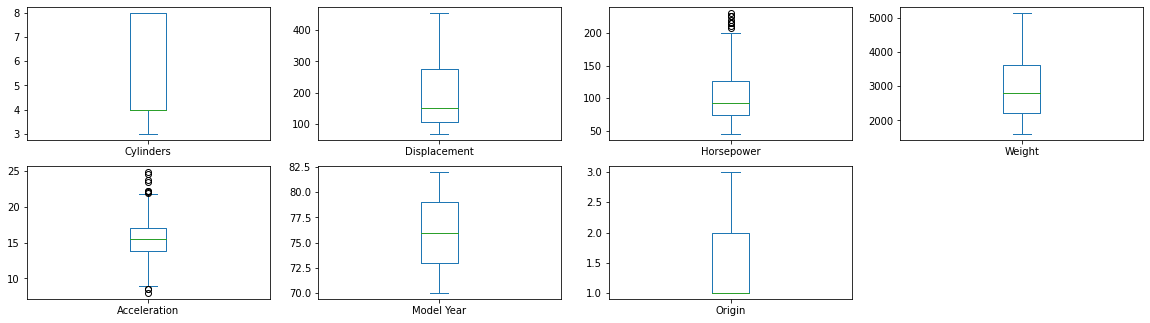

In [189]:
# 箱ひげ図を描画
df = get_box(df)

In [190]:
# 外れ値の除去
df = outlier(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [191]:
# データの形状と欠損数
print(df.shape)
print('欠損の数：{}'.format(df.isnull().sum().sum()))

(392, 8)
欠損の数：21


In [192]:
# 欠損値は行ごと削除
df = df.dropna()

In [193]:
# データの形状と欠損数
print(df.shape)
print('欠損の数：{}'.format(df.isnull().sum().sum()))

(372, 8)
欠損の数：0


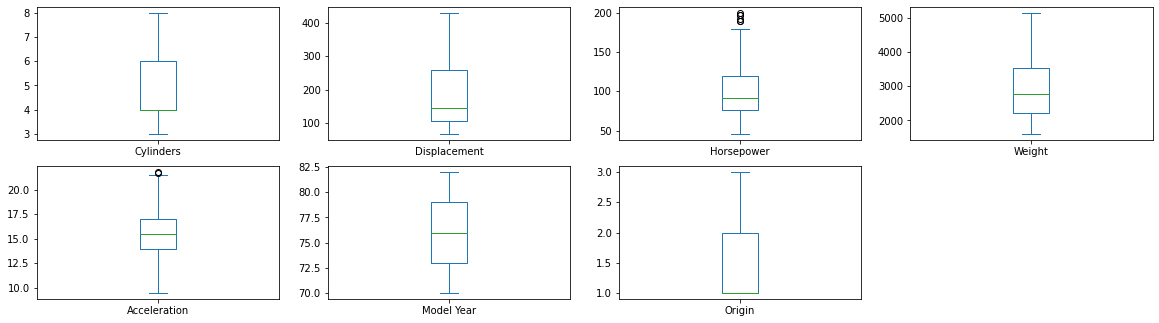

In [194]:
# 箱ひげ図を描画
df = get_box(df)

In [195]:
# 説明変数と目的変数を設定
x = df.drop('MPG', axis=1)
y = df['MPG']

In [196]:
# 分割後のデータ型の確認
print("x_train:{}".format(type(x_train)))
print("y_train:{}".format(type(y_train)))


x_train:<class 'pandas.core.frame.DataFrame'>
y_train:<class 'pandas.core.series.Series'>


In [197]:
# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [198]:
# 各モデルのインスタンスをリストに格納
models = [LinearRegression(), Ridge()]
# 評価比較用の空リストの用意
model_name = []
score = []

# 各モデルをfor文で順に取り出して処理
for model in models:
    # 学習
    model.fit(x_train, y_train)
    # 予測
    pred = model.predict(x_test)
    # モデル名をリストに追加
    model_name.append(model.__class__.__name__)
    # 訓練データの正解率
    train_score_model = format(model.score(x_train, y_train))
    # テストデータの正解率
    test_score_model = format(model.score(x_test, y_test))
    # 正解率をリストに追加
    score.append(test_score_model)

# モデルごとの正解率をデータフレームにする
pd.DataFrame({'model':model_name, 'score':score})

,model,score
0,LinearRegression,0.827080335548577
1,Ridge,0.8270373663624772


In [199]:
# ライブラリをインポート
import pickle

# モデルを保存
with open("mpg.pkl", "wb") as f:
  pickle.dump(model, f)